<a href="https://colab.research.google.com/github/haechis/DeepLearning_tutorial/blob/main/Do_it_DeepLearning_201219.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5장 훈련 노하우를 배웁니다.

- 훈련 노하우: 모델을 안정적으로 훈련하기 위해 필요한 기법들

# 5 - 1 검증 세트를 나누고 전러치 과정을 바우자.

- 4장에서, 훈련 세트는 fit() 메서드에 전달되어 모델을 훈련하는 데 사용
 
- 테스트 세트는 score() 메서드에 전달해 모델의 성능을 평가하였음

- 5장에서는 '테스트 세트'의 사용 방법에 대해 조금 더 깊이 알아본다.

- 목표: 어느 데이터 세트에만 치우친 모델을 만들지 않는다.

## 테스트 세트로 모델을 튜닝한다.

- 로지스틱 회귀로 모델 훈련하고 평가하기

In [ ]:
## cancer 데이터 세트를 읽고, 훈련 세트와 테스트 세트로 나눈다.
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x,y, stratify = y, test_size = 0.2, random_state = 42)

In [ ]:
## SGDClassifier 클래스를 이용하여 로지스틱 회귀 모델을 훈련해 보자.
#fit() 메서드에 x_train_all, y_train_all을 전달하여 모델을 훈련
# -> score() 메서드에 x_test, y_test를 전달하여 성능을 평가
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = 'log', random_state = 42)
sgd.fit(x_train_all, y_train_all)
sgd.score(x_test,y_test)


0.8333333333333334

In [ ]:
## 위를 보면, 테스트 세트 정확도는 약 83#.
# 만약 이 성능이 만족스럽지 않다면 다른 손실 함수를 사용해보면 됨

## loss와 같은 매개변수의 값은 가중치나 절편처럼 알아서 학습되는 것이 아니다.
# -> 즉, 사용자가 직접 선택해야 한다.
# --> 이런 값을 하이퍼파라미터라고 한다.


In [ ]:
## <서포트 벡터 머신>
# SGDClassifier 클래스의 loss 매개변수를 log에서 hinge로 바꾸면 -> 선형 서포트 벡터 머신(SVM) 문제를 푸는 모델이 된다.
# (참고) SVM: '훈련 데이터의 클래스를 구분하는 경계선을 찾는 작업'
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = 'hinge', random_state  = 42)
sgd.fit(x_train_all,y_train_all)
sgd.score(x_test,y_test)

0.9385964912280702

- 위와 같이 loss 매개변수에 다른 값을 적용하는 작업 등 -> 모델을 튜닝한다.

## 모델의 일반화 조심해야 한다.

- 테스트 세트로 모델을 튜닝하면 안 좋음

## 검증 세트를 준비하자

- 이제는 훈련세트: 60, 검증세트: 20, 테스트세트: 20 으로 할당하자.

- 아니면,  / 먼저 전체 -> 훈련 80 , 테스트 20 나누고 / -> 다시 훈련에서 훈련 80, 검증 20으로 나누자


In [ ]:
## 1. 테스트 세트 준비하기
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x,y,stratify = y, test_size = 0.2, random_state = 42)

## 2. 검증 세트 분할하기
# 훈련 8 vs 테스트 2 => (훈련에서) 훈련 8 vs 검증 2 ---> 훈련 64, 검증 20, 테스트 16
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all,stratify = y_train_all, test_size = 0.2, random_state = 42)
print(len(x_train),len(x_val))

364 91


In [ ]:
sgd = SGDClassifier(loss = 'log',random_state= 42)

In [ ]:
sgd.fit(x_train,y_train)
sgd.score(x_val,y_val)

0.6923076923076923

## 사이킷런과 같은 패키지에는 대부분 실습을 위한 데이터가 잘 가공되어 있음

- 실제로는 그렇지 않음

- 데이터를 전러치 하는 과정을 배워보자



In [ ]:
## 데이터 전처리와 특성의 스케일을 알아보자.

# 특성의 스케일은 알고리즘에 영향을 준다. 

# 잘 정리된 데이터도 전처리를 해야 하는 경우가 있는데, 이는 특성의 스케일이 다른 경우이다.

# 예를 들어,  사과의 당도는 1~10 이면, 무게는 300~500 g 으로 스케일 차이가 난다.

# 즉, 이러한 경우에는 스케일을 조정해야 한다.



['mean perimeter' 'mean area']


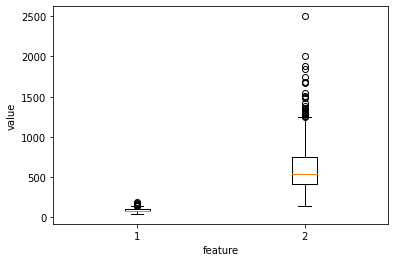

In [ ]:
## 먼저 스케일 조정없이 모델을 훈련해 보자 . 어떤 일이 발생할까

## 1. 훈련 데이터 준비하고 스케일 비교하기

from matplotlib import pyplot as plt
import numpy as np

print(cancer.feature_names[[2,3]])
plt.boxplot(x_train[:,2:4])
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [ ]:
## 2. 가중치를 기록할 변수와 학습률 파라미터 추가하기

# 단일신경망에서 가중치의 값을 저장하여 가중치의 변화를 관찰할 "인스턴스 변수"를 추가하자.
# + 학습률이라는 개념도 도입하자. 

## 단일층 신경망 예시
class SingleLayer:

  def __init__(self, learning_rate = 0.1):
      # 입력데이터의 특성이 많으므로 특정한 값으로 초기화하지 않음
      self.w = None
      self.b = None
      self.losses = [] ## 손실 함수의 결과값을 저장할 리스트! / 샘플마다 손실 함수를 계산하고, 그 결과값을 모두 더하여 샘플로 나눈 평균값을 저장함.
      self.w_history  = []    # 가중치 판단 인스턴스
      # 학습률: learning rate
      #         하이퍼파라미터이다. 이 값으로 가중치의 업데이트 양을 조절하자. 
      #         적절한 학습률을 이용하여 전역 최솟값을 찾아 나아가자
      self.lr = learning_rate # 학습률

  def forpass(self,x):
    z = np.sum(x*self.w) + self.b # 직선 방정식을 계산한다.
    return z
  
  def backprop(self,x,err):
    # 가중치에 대한 gradient : w_grad / 절편에 대한 gradient : b_grad
    w_grad = x*err
    b_grad = 1*err
    return w_grad, b_grad
  
  def activation(self,z):
    # 시그모이드 함수 a
    a = 1 / (1 + np.exp(-z))
    return a

  ## 훈련하는 메서드 구현하기
  # 훈련을 수행하는 fit()
  def fit(self, x, y, epochs = 100):
    self.w = np.ones(x.shape[1])      # 가중치를 초기화한다. / x.shape[1] -> 열 개수
    self.b = 0                        # 절편을 초기화한다.
    
    # 가중치를 기록하고 업데이트 양을 조절한다.
    self.w_history.append(self.w.copy())

    np.random.seed(42) # 무작위로 시드를 지정한다. 

    for i in range(epochs):           # epochs 만큼 반복
      loss = 0
      ## 인덱스를 섞는다.
      # 그러니까, 여러행의 순서를 섞는다. -> 가중치 최적화 탐색 과정이 다양해지겠다.
      indexes = np.random.permutation(np.arange(len(x))) 
      for i in indexes:       # 모든 샘플에 대해 반복
        z = self.forpass(x[i])              # 정방향 계산
        a = self.activation(z)        # 활성화 함수 적용
        err = -(y[i] - a)              # 오차 계산
        w_grad, b_grad = self.backprop(x[i],err) # 역방향 계산

        # 이제 가중치에 학습률을 고려한다. ==> 가중치 업데이트 양을 조절한다.
        self.w -= w_grad * self.lr
        self.b -= b_grad

        ## 그리고 가중치를 기록한다.
        self.w_history.append(self.w.copy())

        ## ----- 안전한 로그 계산을 위해 클리핑 한 후 손실을 누적한다.
        # a가 0에 가까워지면 np.log() 함수값이 음의 무한대가 되고, a가 1에 가까워지면 np.log()함수값이 0이 되기 때문에
        # a의 값이 -1e-10 ~ 1-1e10 사이가 되도록 조정
        # 이때 np.clip() 사용 -> 범위 밖의 값을 잘라낸다.
        a = np.clip(a, 1e-10,1-1e-10)
        # 매 epoch 마다 손실을 저장한다.
        loss += -(y[i]*np.log(a) + (a-y[i])*np.log(1-a))
      self.losses.append(loss/len(y))

  ## 예측하는 메서드 구현
  # x가 2차원 배열로 전달된다고 가정하고 구현
  # 예측값은 입력값을 선형 함수, 활성화 함수, 임계 함수 순서대로 통과시키면서 구할 수 있다.
  def predict(self,x):
    z = [self.forpass(x_i) for x_i in x]  # 선형 함수 적용
    return np.array(z) > 0                # 계단 함수 적용
    # a = self.activation(np.array(z))      # 활성화 함수 적용
    #return a > 0.5                        # step function(계단 함수) 적용
  def score(self, x,y):
    return np.mean(self.predict(x) == y)


In [ ]:
## 4. 그럼 이제 진짜로 스케일 조정 없이 모델을 훈련해보자.
layer1 = SingleLayer()
layer1.fit(x_train,y_train)
layer1.score(x_val,y_val)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in exp


0.9120879120879121

Text(0, 0.5, 'w[3]')

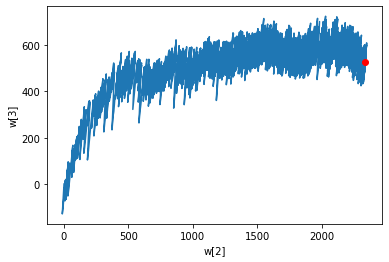

In [ ]:
## 5. layer1 객체의 인스턴스 변수 w_history에는 100번의 에포크 동안 변경된 가중치가 모두 기록되어 있다.
# 이때, 3번, 4번 요소 (w[2],w[3])는 각각 mean perimeter와 mean area 특성에 대한 가중치이다.
# 이 요소로 그래프를 그려보자

w2 = []
w3 = []
for w in layer1.w_history:
  w2.append(w[2])
  w3.append(w[3])

plt.plot(w2,w3)
plt.plot(w2[-1],w3[-1],'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')

In [ ]:
print(len(layer1.w_history))

36401


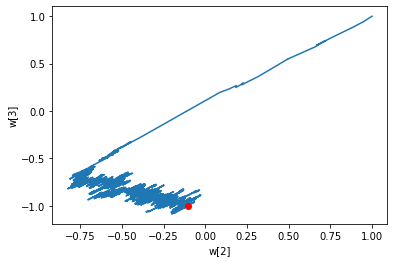

In [ ]:
## 스케일을 조정해 모델을 훈련해보자.

# 스케일 방법 1. 표준화 standardization
# z = (x-mu) / s

# 1. 넘파이로 표준화 구현하기
train_mean = np.mean(x_train,axis= 0)
train_std = np.std(x_train,axis = 0)
x_train_scaled = (x_train-train_mean)/train_std

# 2. 모델 훈련하기
layer2 = SingleLayer()
layer2.fit(x_train_scaled,y_train)
w2 = []
w3 = []
for w in layer2.w_history:
  w2.append(w[2])
  w3.append(w[3])
plt.plot(w2,w3)
plt.plot(w2[-1],w3[-1],'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()



In [ ]:
## 위 그래프를 보면, w2와 w3의 변화 비율이 비슷하기 때문에 대각선 방향으로 가중치가 이동되었다.
# 또한 두 특성의 스케일을 비슷하게 맞추었으므로 최적값에 빠르게 근접하였다.
# 이제 검증 세트를 통해 모델을 평가해보자.


## 3. 모델 성능 ㅍ여가
layer2.score(x_val,y_val)


0.37362637362637363

In [ ]:
# 띠용? 성능이 안 좋아졌다.
# 걱정 ㄴㄴ 검증 세트의 스케일을 바꾸지 않았기 때문,
val_mean = np.mean(x_val,axis = 0)
val_std = np.std(x_val,axis = 0)
x_val_scaled = (x_val-val_mean)/val_std
layer2.score(x_val_scaled,y_val)

0.967032967032967

In [ ]:
# 와우 정확도가 약 96% 되었다,,
# 그러나 벗, 여기에는 뭔가 함정이 있다,,


## 스케일을 조정한 다음에 실수하기 쉬운 함정

- 함정: '훈련 세트'와 '검증 세트'가 다른 비율로 스케일이 조정된 경우

- 예를 들어 보자. 훈련 세트와 검증 세트 각각 50개씩 데이터를 뽑아보자

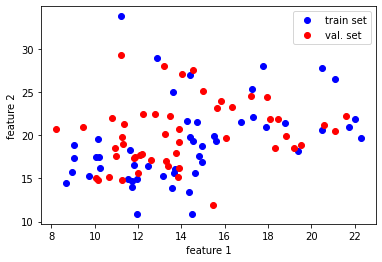

In [ ]:
## 1. 원본 훈련 세트와 검증 세트로 산점도 그리기
plt.plot(x_train[:50,0],x_train[:50,1],'bo')
plt.plot(x_val[:50,0],x_val[:50,1],'ro')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['train set','val. set'])
plt.show()

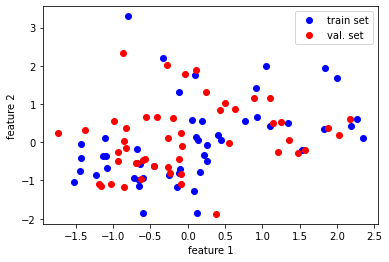

In [ ]:
## 2. 전처리한 훈련 세트와 검증 세트로 산점도 그리기
plt.plot(x_train_scaled[:50,0],x_train_scaled[:50,1],'bo')
plt.plot(x_val_scaled[:50,0],x_val_scaled[:50,1],'ro')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['train set','val. set'])
plt.show()

- 미세하지만 조금 다른 비율인 것을 확인할 수 있다.



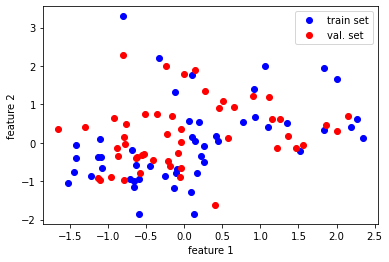

In [ ]:

## 3. 올바르게 검증 세트 전처리하기

# <<< 검증 역시 훈련 세트의 평균과 표준편차를 이용하여 스케일 변환한다!!>>>

x_val_scaled = (x_val-train_mean)/train_std

# ------------------------------------------

plt.plot(x_train_scaled[:50,0],x_train_scaled[:50,1],'bo')
plt.plot(x_val_scaled[:50,0],x_val_scaled[:50,1],'ro')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['train set','val. set'])
plt.show()


In [ ]:
## 이제 원본 데이터읫 ㅏㄴ점도와 스케일 조정 이후의 산점도가 같아졌다.

# 4. 모델 평가하기

layer2.score(x_val_scaled,y_val)

0.967032967032967

# 05-2 과대적합과 과소적합을 알아봅시다.

- 훈련 세트와 검증 세트에 대한 모델의 성능에 대해 조금 더 깊이 고찰해보자 -> 과대적합, 과소 적합

## 학습 곡선을 통해 과대적합과 고소적합을 알아보자.

- 과대적합이란 모델이 훈련 세트에서는 좋은 성능을 내지만 검증 세트에서는 낮은 성능을 내는 경우를 말한다. 

- 과소적합이란 훈련 세트와 검증 세트의 성능에는 차이가 크지 않지만 모두 낮은 성능을 내는 경우이다.



## 훈련 세트의 크기와 과대적합, 과소적합 분석하기

- 과대적합의 주요 원인 중 하나는 훈련 세트에 충분히 다양한 패턴의 샘플이 포함되지 않은 경우 -> 이런 경우에는 더 많은 훈련 샘플을 모아 검증 세트의 성능을 향상시킬 수 있다. // 그러나, 현실에서 훈련 샘플을 많이 모을 수 없는 경우 -> 모델이 훈련 세트에 집착하지 않도록 가중치를 제한할 수 있다. 이를'모델의 복잡도를 낮춘다.'라고 한다.

- 과대적합을 대개 분산이 크다 (High Variance) / 과소적합을 대개 편향이 크다 (High Bias)라고 한다.

- 과소적합을 해결하는 방법은, 복잡도가 더 높은 모델을 사용하거나 가중치의 규제를 완화하는 것이다.

- -> 과대적합과 과소적합 사이의 절충점을 잘 찾아야 함.

## 손실함수와 에포크(모델 복잡도) 간의 과대, 과소 적합 분석

- 과대적합: 에포크가 많이 진행할수록 훈련세트의 샘플에 밀착하여 학습하므로 특정 최적점 이후에 과대적합이 발생한다.

- 과소적합: 최적점으로 가기전에 훈련과 검증 세트의 손실이 비슷한 수준으로 유지되면서 줄어드는 것.


- 가중치가 많은 경우 -> 복잡도가 높은 모델 / -> 무조건 좋지는 않음 -> 훈련 세트에만 잘 맞는 형태로 만들어서 훈련 세트에서만 좋은 성능을 낼 가능성이 생김 -> 과대적합

- 적절한 에포크를 찾아야 함!




## 적절한 편향-분산 트레이드오프를 선택합시다.

- 과소적합된 모델은 '편향되었다' , 과대적합된 모델은 '분산이 크다'

- 편향을 줄이면 -> 분산이 커지고 // 분산을 줄이면 -> 편향이 커진다.

- (=) 훈련 세트의 성능을 높이면 -> 검증 세트의 성능이 떨어지고 // 훈련 세트와 검증세트의 성능 차이를 줄이면 -> 훈련 세트의 성능이 낮아진다.

- 중간지점을 찾아야함.


In [ ]:
## 2. 가중치를 기록할 변수와 학습률 파라미터 추가하기

# 단일신경망에서 가중치의 값을 저장하여 가중치의 변화를 관찰할 "인스턴스 변수"를 추가하자.
# +20.12.19 학습률이라는 개념도 도입하자. 
# +20.12.20 분산-편향 트레이드오프


## 단일층 신경망 예시
class SingleLayer:

  def __init__(self, learning_rate = 0.1):
      # 입력데이터의 특성이 많으므로 특정한 값으로 초기화하지 않음
      self.w = None
      self.b = None
      self.losses = [] ## 손실 함수의 결과값을 저장할 리스트! / 샘플마다 손실 함수를 계산하고, 그 결과값을 모두 더하여 샘플로 나눈 평균값을 저장함.
      
      # val_losses: 검증 세트의 손실을 기록하기 위한 변수
      self.val_losses = []

      self.w_history  = []    # 가중치 판단 인스턴스
      # 학습률: learning rate
      #         하이퍼파라미터이다. 이 값으로 가중치의 업데이트 양을 조절하자. 
      #         적절한 학습률을 이용하여 전역 최솟값을 찾아 나아가자
      self.lr = learning_rate # 학습률

  def forpass(self,x):
    z = np.sum(x*self.w) + self.b # 직선 방정식을 계산한다.
    return z
  
  def backprop(self,x,err):
    # 가중치에 대한 gradient : w_grad / 절편에 대한 gradient : b_grad
    w_grad = x*err
    b_grad = 1*err
    return w_grad, b_grad
  
  def activation(self,z):
    # 시그모이드 함수 a
    a = 1 / (1 + np.exp(-z))
    return a

  # 검증 손실 계산하기. (훈련 세트의 손실 계산 방법과 동일함)
  def update_val_loss(self,x_val,y_val):
    if x_val is None:
      return
    val_loss = 0
    for i in range(len(x_val)):
      z = self.forpass(x_val[i])  # 정방향 계산
      a = self.activation(z)      # 활성화 함수 적용
      a = np.clip(a, 1e-10, 1-1e-10) # 자르기
      # 로지스틱 손실함수 계산
      val_loss += -(y_val[i]*np.log(a) + (1-y_val[i])*np.log(1-a))
    self.val_losses.append(val_loss/len(y_val))


  ## 훈련하는 메서드 구현하기
  # 훈련을 수행하는 fit()
  # 검증 세트를 전달받을 수 있도록 x_val과 y_val을 추가
  def fit(self, x, y, epochs = 100, x_val = None, y_val = None):
    self.w = np.ones(x.shape[1])      # 가중치를 초기화한다. / x.shape[1] -> 열 개수
    self.b = 0                        # 절편을 초기화한다.
    
    # 가중치를 기록하고 업데이트 양을 조절한다.
    self.w_history.append(self.w.copy())

    np.random.seed(42) # 무작위로 시드를 지정한다. 

    for i in range(epochs):           # epochs 만큼 반복
      loss = 0
      ## 인덱스를 섞는다.
      # 그러니까, 여러행의 순서를 섞는다. -> 가중치 최적화 탐색 과정이 다양해지겠다.
      indexes = np.random.permutation(np.arange(len(x))) 
      for i in indexes:       # 모든 샘플에 대해 반복
        z = self.forpass(x[i])              # 정방향 계산
        a = self.activation(z)        # 활성화 함수 적용
        err = -(y[i] - a)              # 오차 계산
        w_grad, b_grad = self.backprop(x[i],err) # 역방향 계산

        # 이제 가중치에 학습률을 고려한다. ==> 가중치 업데이트 양을 조절한다.
        self.w -= w_grad * self.lr
        self.b -= b_grad

        ## 그리고 가중치를 기록한다.
        self.w_history.append(self.w.copy())

        ## ----- 안전한 로그 계산을 위해 클리핑 한 후 손실을 누적한다.
        # a가 0에 가까워지면 np.log() 함수값이 음의 무한대가 되고, a가 1에 가까워지면 np.log()함수값이 0이 되기 때문에
        # a의 값이 -1e-10 ~ 1-1e10 사이가 되도록 조정
        # 이때 np.clip() 사용 -> 범위 밖의 값을 잘라낸다.
        a = np.clip(a, 1e-10,1-1e-10)
        # 매 epoch 마다 손실을 저장한다.
        loss += -(y[i]*np.log(a) + (a-y[i])*np.log(1-a))
      self.losses.append(loss/len(y))
      # 검증 세트에 대한 손실을 계산한다.
      self.update_val_loss(x_val,y_val)

  ## 예측하는 메서드 구현
  # x가 2차원 배열로 전달된다고 가정하고 구현
  # 예측값은 입력값을 선형 함수, 활성화 함수, 임계 함수 순서대로 통과시키면서 구할 수 있다.
  def predict(self,x):
    z = [self.forpass(x_i) for x_i in x]  # 선형 함수 적용
    return np.array(z) > 0                # 계단 함수 적용
    # a = self.activation(np.array(z))      # 활성화 함수 적용
    #return a > 0.5                        # step function(계단 함수) 적용
  def score(self, x,y):
    return np.mean(self.predict(x) == y)


In [ ]:
layer3 = SingleLayer()
layer3.fit(x_train_scaled, y_train, x_val = x_val_scaled, y_val = y_val)

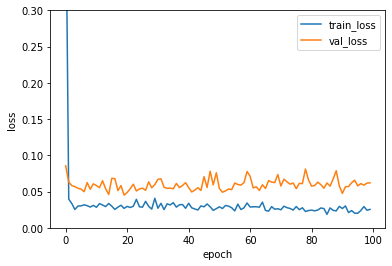

In [ ]:
plt.ylim(0,0.3)
plt.plot(layer3.losses)
plt.plot(layer3.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'])
plt.show()

In [ ]:
## 훈련 조기 종료하기
# early stopping
layer4 = SingleLayer()
layer4.fit(x_train_scaled, y_train, epochs = 20)
layer4.score(x_val_scaled,y_val)


0.978021978021978

# 05-3 규제 방법을 배우고 단일층 신경망에 적용합니다.

- 가중치 규제: 말그대로 가중치의 값이 커지지 않도록 제한하는 기법

- 가중치를 규제하면 모델의 일반화 성능이 올라간다. 

- L1 규제와 L2 규제를 알아보자잇


## < L1 규제 >

- L1 규제는 손실 함수에 가중치의 절댓값인 L1 노름(norm)을 추가한다. 
    ||w||_1 = sig(i =1 ~n) |w_i|

    즉, '가중치의 절댓값을 손실 함수에 더한 것'이다.

- 로지스틱 손실함수에 L1 규제를 적용해 보자.

  L = -(y * log(a) + (1-y) * log(1-a))

  => L1 규제

  L = -(y * log(a) + (1-y) * log(1-a)) + alpha * sig(i=1~n)|w_i|

  (alpha: 규제의 양을 조절하는 파라미터, 하이퍼파라미터 / 예를 들어 alpha 값이 크면 전체 손실 함수의 값이 커지지 않도록 w값의 합이 작아져야 한다. 이것을 보고 규제가 강해졌다고 한다.(가중치가 작아졌으므로) //// 반대로 alpha 값이 작으면 w의 합이 커져도 손실 함수의 값이 큰 폭으로 커지지 않겠다. 즉 규제가 약해진다. )

  - L1 규제를 적용한 로지스틱 손실함수를 미분해보자.

  (L1 규제만 미분해 보자.)

  (참고, |w|를 w에 대해 미분하면, w가 양수이면 +1, 음수이면 -1)

  aL/aw = -(y-a)*x + a* sign(w)  [sign(w) : w의 부호]

  이 식을 가중치 업데이트 식에 적용하면 다음과 같다.

  w = w - nu * aL/aw = w + nu * ((y-a) *x - a * sin(w))
  (nu: 학습률)

  위 식을 보면, 규제 하이퍼파라미터 alpha와 가중치의 부호를 곱해서 업데이트할 그래디언트에 더해주면 된다.

  -> w_gra += alpha * sign(w)

  - 절편은 따로 규제하지 않는다. 절편은 모델의 이동에만 영향을 미치므로.

  - SGDClassifier 클래스에서는 penalty 매개변수 값을 l1으로 지정하는 방법으로 L1 규제를 적용할 수 있다. 또 규제의 강도를 제어하는 하이퍼파라미터 alpha를 위한 매개변수를 제공한다.


## 회귀 모델에 L1 규제를 추가한 것을 라쏘 모델이라고 한다.

- 손실 함수(제곱 오차)에 L1 규제를 적용할 수 있다. -> Lasso

- 라쏘는 가중치를 줄이다 못해 일부 가중치를 0으로 만들 수도 있다.

- 가중치가 0인 특성은 모델에서 사용할 수 없는 것. 

- (sklearn.linear_model.Lass)

- L1 규제는 하이퍼파라미터에 많이 의존한다. 즉, 가중치의 크기에 따라 규제의 양이 변하지 않으므로 규제 효과가 좋다고 할 수 없다. 

 - -> 규제 효과가 좋아 널리 사용되는 L2 규제에 대해 알아보자.



## L2 규제

- L2 규제는 손실 함수에 가중치에 대한 L2 노름의 제곱을 더한다.

- L = -(y * log(a) + (1-y)*log(1-a)) + (1/2) * alpha * sig(i=1~n)|w_i|^2

- alpha : 하이퍼파라미터, 1/2 : 미분을 보기 좋기 위해 추가한 상수

## L2 규제의 미분

- 간단하게 가중치 벡터 w만 남는다.

- aL/aw = -(y-a)*x + a*w

- 이 식을 가중치 업데이트 식에 대입해 보자.

 - w = w - nu*aL/aw = w + nu* ((y-a)*x -a * w)

 식으로 표현하면, w_grad += alpha * w


## L2 규제를 널리 사용하는 이유.

 - L2 규제는 그레이디언트 계산에 가중치의 값 자체가 포함됨 (L1 규제는 가중치의 부호만 사용)

 - L2 규제는 가중치를 완전히 0으로 만들지 않는다. 

 - 가중치가 0이면 어떨 때는 효과가 있지만 , 모델의 복잡도가 떨어진다.


## 릿지 (Ridge) 모델

- 회귀 모델에 L2 규제를 적용한 것을 릿지 모델이라고 한다.

- sklearn.linear_model.Ridge

## L1 규제, L2 규제

<L1 규제>

w_grad += alpha * np.sign(w) [sign(w): w의 부호]

<L2 규제>

w_grad += alpha * w

In [ ]:
## 2. 가중치를 기록할 변수와 학습률 파라미터 추가하기

# 단일신경망에서 가중치의 값을 저장하여 가중치의 변화를 관찰할 "인스턴스 변수"를 추가하자.
# +20.12.19 학습률이라는 개념도 도입하자. 
# +20.12.20 분산-편향 트레이드오프
# +20.12.20 L1, L2 규제

## 단일층 신경망 예시
class SingleLayer:

  def __init__(self, learning_rate = 0.1, l1 = 0, l2 = 0):
      # 입력데이터의 특성이 많으므로 특정한 값으로 초기화하지 않음
      self.w = None
      self.b = None
      self.losses = [] ## 손실 함수의 결과값을 저장할 리스트! / 샘플마다 손실 함수를 계산하고, 그 결과값을 모두 더하여 샘플로 나눈 평균값을 저장함.
      
      # val_losses: 검증 세트의 손실을 기록하기 위한 변수
      self.val_losses = []

      self.w_history  = []    # 가중치 판단 인스턴스
      # 학습률: learning rate
      #         하이퍼파라미터이다. 이 값으로 가중치의 업데이트 양을 조절하자. 
      #         적절한 학습률을 이용하여 전역 최솟값을 찾아 나아가자
      self.lr = learning_rate # 학습률


      ## L1, L2 규제 강도를 조정
      self.l1 = l1
      self.l2 = l2


  def forpass(self,x):
    z = np.sum(x*self.w) + self.b # 직선 방정식을 계산한다.
    return z
  
  def backprop(self,x,err):
    # 가중치에 대한 gradient : w_grad / 절편에 대한 gradient : b_grad
    w_grad = x*err
    b_grad = 1*err
    return w_grad, b_grad
  
  def activation(self,z):
    # 시그모이드 함수 a
    a = 1 / (1 + np.exp(-z))
    return a

  # 검증 손실 계산하기. (훈련 세트의 손실 계산 방법과 동일함)
  def update_val_loss(self,x_val,y_val):
    if x_val is None:
      return
    val_loss = 0
    for i in range(len(x_val)):
      z = self.forpass(x_val[i])  # 정방향 계산
      a = self.activation(z)      # 활성화 함수 적용
      a = np.clip(a, 1e-10, 1-1e-10) # 자르기
      # 로지스틱 손실함수 계산
      val_loss += -(y_val[i]*np.log(a) + (1-y_val[i])*np.log(1-a))
    self.val_losses.append(val_loss/len(y_val)+self.reg_loss()) # 검증 세트의 손실을 계산

  ## 로지스틱 손실 함수 계산에 페널티 항 추가하기
  # 로지스틸 손실 함수를 계산할 때 페널티 항에 대한 값을 더해야 한다. 
  def reg_loss(self):
    return self.l1* np.sum(np.abs(self.w)) + self.l2 / 2* np.sum(self.w**2)


  ## 훈련하는 메서드 구현하기
  # 훈련을 수행하는 fit()
  # 검증 세트를 전달받을 수 있도록 x_val과 y_val을 추가
  def fit(self, x, y, epochs = 100, x_val = None, y_val = None):
    self.w = np.ones(x.shape[1])      # 가중치를 초기화한다. / x.shape[1] -> 열 개수
    self.b = 0                        # 절편을 초기화한다.
    
    # 가중치를 기록하고 업데이트 양을 조절한다.
    self.w_history.append(self.w.copy())

    np.random.seed(42) # 무작위로 시드를 지정한다. 

    for i in range(epochs):           # epochs 만큼 반복
      loss = 0
      ## 인덱스를 섞는다.
      # 그러니까, 여러행의 순서를 섞는다. -> 가중치 최적화 탐색 과정이 다양해지겠다.
      indexes = np.random.permutation(np.arange(len(x))) 
      for i in indexes:       # 모든 샘플에 대해 반복
        z = self.forpass(x[i])              # 정방향 계산
        a = self.activation(z)        # 활성화 함수 적용
        err = -(y[i] - a)              # 오차 계산
        w_grad, b_grad = self.backprop(x[i],err) # 역방향 계산


        # 그레이디언트에서 페널티 항의 미분값을 더한다.
        w_grad += self.l1 * np.sign(self.w) + self.l2 * self.w

        # 이제 가중치에 학습률을 고려한다. ==> 가중치 업데이트 양을 조절한다.
        self.w -= w_grad * self.lr
        self.b -= b_grad

        ## 그리고 가중치를 기록한다.
        self.w_history.append(self.w.copy())

        ## ----- 안전한 로그 계산을 위해 클리핑 한 후 손실을 누적한다.
        # a가 0에 가까워지면 np.log() 함수값이 음의 무한대가 되고, a가 1에 가까워지면 np.log()함수값이 0이 되기 때문에
        # a의 값이 -1e-10 ~ 1-1e10 사이가 되도록 조정
        # 이때 np.clip() 사용 -> 범위 밖의 값을 잘라낸다.
        a = np.clip(a, 1e-10,1-1e-10)
        # 매 epoch 마다 손실을 저장한다.
        loss += -(y[i]*np.log(a) + (a-y[i])*np.log(1-a))
      self.losses.append(loss/len(y))
      # 검증 세트에 대한 손실을 계산한다.
      self.update_val_loss(x_val,y_val)

  ## 예측하는 메서드 구현
  # x가 2차원 배열로 전달된다고 가정하고 구현
  # 예측값은 입력값을 선형 함수, 활성화 함수, 임계 함수 순서대로 통과시키면서 구할 수 있다.
  def predict(self,x):
    z = [self.forpass(x_i) for x_i in x]  # 선형 함수 적용
    return np.array(z) > 0                # 계단 함수 적용
    # a = self.activation(np.array(z))      # 활성화 함수 적용
    #return a > 0.5                        # step function(계단 함수) 적용
  def score(self, x,y):
    return np.mean(self.predict(x) == y)


In [ ]:
## cancer 데이터 세트에 L1 규제 적용하기
# 규제 강도는 0.0001, 0.001, 0.01 세 가지를 선택해보자.
# for 문을 사용하여 각각 다른 강도의 하이퍼파라미터로 모델을 만들고 학습 곡선과 가중치 그래프로 나타내었다.

l1_list = [0.0001, 0.001, 0.01]

for l1 in l1_list:
  lyr = SingleLayer(l1=l1)
  lyr.fit(x_train_scaled,y_train, x_val = x_val_scaled,y_val = y_val)

  plt.plot(lyr.losses)
  plt.plot(lyr.val_losses)
  plt.title('Learning Curve (l1 ={})'.format(l1))
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train_loss','val_loss'])
  plt.ylim(0,0.3)
  plt.show()

  plt.plot(lyr.w, 'bo')
  plt.title('Weight (l1 = {})'.format(l1))
  plt.ylabel('value')
  plt.xlabel('weight')
  plt.ylim(-4,4)
  plt.show()


NameError: ignored

위 그래프들을 보면 (책이랑 좀 다름 . 책 참고 (p.145))  규제가 더 커질수록 훈련 세트의 손실과 검증 세트의 손실이 모두 높아진다. 즉, 과소적합 현상이 나타난다. 

가중치 그래프를 보면, 규제 강도 l1이 높아질수록 가중치의 값이 0에 가까워진다.

적절한 l1하이퍼파라미터는 0.001정도겠다.


In [ ]:
layer5 = SingleLayer(l1 = 0.001)
layer5.fit(x_train_scaled,y_train,epochs = 20)
layer5.score(x_val_scaled,y_val)


0.978021978021978

이 결과는 사실 l1 적용하지 않았을 때랑 결과가 같다.

이제 L2 규제를 적용해보자.

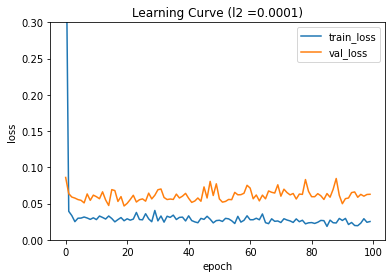

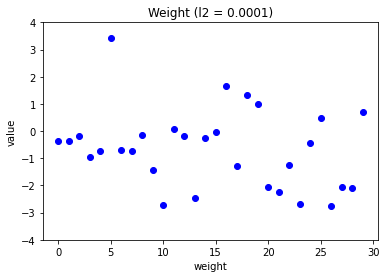

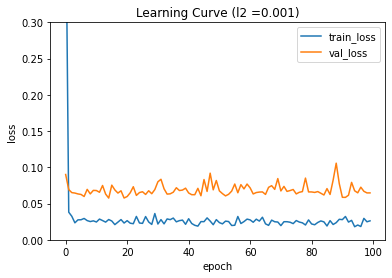

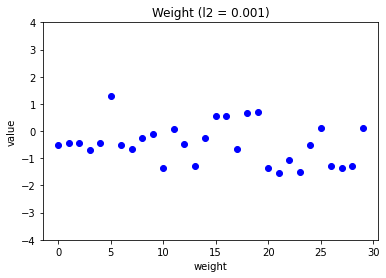

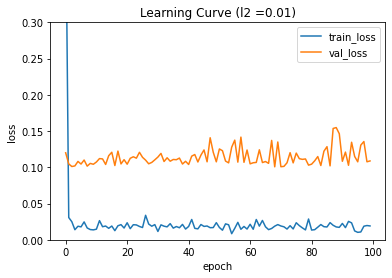

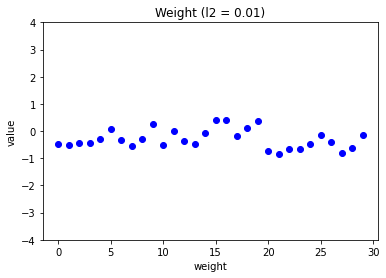

In [ ]:
## Cancer 데이터 세트에 L2 규제 적용
l2_list = [0.0001, 0.001, 0.01]

for l2  in l2_list:
  lyr = SingleLayer(l2 = l2)
  lyr.fit(x_train_scaled,y_train, x_val = x_val_scaled,y_val = y_val)

  plt.plot(lyr.losses)
  plt.plot(lyr.val_losses)
  plt.title('Learning Curve (l2 ={})'.format(l2))
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train_loss','val_loss'])
  plt.ylim(0,0.3)
  plt.show()

  plt.plot(lyr.w, 'bo')
  plt.title('Weight (l2 = {})'.format(l2))
  plt.ylabel('value')
  plt.xlabel('weight')
  plt.ylim(-4,4)
  plt.show()


그래프를 천천히 비교해보면, L2 규제도 L1 규제와 비슷한 양상이다.

하지만 마지막 학습 곡선 그래프를 보면 L2 규제는 규제 강도가 강해져도(l2 = 0.01) ㅣ1 규제만큼 과소적합이 심해지지는 않는다. 가중치를 봐도 0에 너무 가깝게 줄어들지 않는다. L2 규제를 50번 에포크 만큼 훈련하고 성능을 평가해보자.

In [ ]:
layer6 = SingleLayer(l2 = 0.01)
layer6.fit(x_train_scaled,y_train,epochs = 50)
layer6.score(x_val_scaled,y_val)

0.978021978021978

결과를 보니 L1 규제와 동일하다. 사실 Cancer 데이터 세트의 샘플 개수는 아주 적어서 L1 규제나 L2 규제나 모델 성능에 큰 차이가 없다. 

여기에서는 91개 검증 샘플 중 89개의 샘플을 올바르게 예측하였다.


In [ ]:
np.sum(layer6.predict(x_val_scaled) == y_val)

89

하지만 L1 규제보다 L2 규제의 epoch를 더 많이 하였다. 즉, 가중치를 강하게 제한했기 때문에 검증 세트의 손실값을 일정한 수준으로 유지하면서 알고리즘이 전역 최솟값을 찾는 과정을 오래 반복할 수 있었다.



In [ ]:
## SGDClassifier에서 규제 사용
# penalty 매개변수에 L1, L2 매개변수 값 전달, alpha 매개변수에 규제 강도 지정

sgd = SGDClassifier(loss='log',penalty='l2',alpha =0.001, random_state = 42)
sgd.fit(x_train_scaled,y_train)
sgd.score(x_val_scaled,y_val)

0.978021978021978

# 05-4 교차 검증을 알아보고 사이킷런으로 수행해 보자.
## 교차검증은 데이터 개수가 부족할 때 사용 : cross validation

- 먼저 전체 데이터를 훈련 8, 테스트 2로 나눔

- 훈련 8을 5개의 폴드로 나눔

- 5개의 폴드를 하나씩 돌아가면서 검증에 사용

- k개의 폴드로 k번 성능 평가 -> 계산된 성능의 평균을 내어 최종 성능을 계산

In [ ]:
## k-폴드 교차 검증 구현

# validation_scores: 각 폴드의 검증 점수를 저장하기 위한 리스트
validation_scores = []

k = 10 # 전체 훈련 세트의 샘플 개수를 k로 설정
bins = len(x_train)//k # bins 변수의 개수만큼 건너뛰며 검증 폴드와 훈련 폴드를 구분할 것임

for i in range(k):
  start = i*bins
  end = (i+1)*bins
  
  # 검증 폴드
  val_fold = x_train_all[start:end]
  val_target = y_train_all[start:end]

  # 훈련 폴드들 (훈련 데이터에서 검증 폴드 제외)
  train_index = list(range(0,start)) + list(range(end, len(x_train)))
  train_fold = x_train_all[train_index]
  train_target = y_train_all[train_index]

  train_mean = np.mean(train_fold,axis = 0)
  train_std = np.std(train_fold,axis = 0)
  train_fold_scaled = (train_fold - train_mean) / train_std
  val_fold_scaled = (val_fold - train_mean) / train_std
  
  lyr = SingleLayer(l2 = 0.01)
  lyr.fit(train_fold_scaled, train_target, epochs = 50)
  score = lyr.score(val_fold_scaled,val_target)
  validation_scores.append(score)

print(np.mean(validation_scores))



0.9583333333333333


(결과가 책이랑 좀 다름,,;;)

## 사이킷런으로 교차 검증을 해보자.

- 사이킷런의 model_selection 모듈에는 교차 검증을 위한 cross_validate() 함수가 있다.

_ 우리가 만든 SingleLayer 클래스와 cross_validate() 함수를 같이 사용하려면 SingleLayer 클래스에 몇 기능을 추가해야함

- cros_validate()함수 -> cv 매개변수: k 개수 


In [ ]:
from sklearn.model_selection import cross_validate
sgd = SGDClassifier(loss='log',penalty = 'l2',alpha = 0.001, random_state = 42)
scores = cross_validate(sgd, x_train_all, y_train_all, cv = 10)
print(np.mean(scores['test_score']))

0.850096618357488


In [ ]:
## 위 결과는 전처리를 하지 않아서 결과가 안좋음
# Pipeline 클래스를 사용하여 교차 검증 수행하기
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
pipe = make_pipeline(StandardScaler(),sgd)
scores = cross_validate(pipe, x_train_all,y_train_all,cv = 10, return_train_score = True)
print(np.mean(scores['test_score']))

0.9694202898550724
